In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_cleaned.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (404800, 27)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-Size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan Emi,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,Mnc,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-Commerce Shopping Emi,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education Emi,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-Size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle Emi,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-Size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances Emi,252000.0,7,Not_Eligible,500.0


In [2]:
df.isna().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  float64
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               404800 non-null  object 
 4   monthly_salary          404800 non-null  float64
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            404800 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [16]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'marital_status', 'education', 'employment_type',
       'company_type', 'house_type', 'existing_loans', 'emi_scenario',
       'emi_eligibility'],
      dtype='object')

In [4]:
for col in df.columns:
    unique_vals = df[col].unique()
    nr_values = len(unique_vals)
    if nr_values <= 20:
        print(f"{col}: {unique_vals}")
    else:
        print(f"{col}: Unique values count = {nr_values}")


age: [38. 58. 48. 32. 27. 47. 37. 31. 59. 49. 33. 26. 39. 57. 28.]
gender: ['Female' 'Male']
marital_status: ['Married' 'Single']
education: ['Professional' 'Graduate' 'High School' 'Post Graduate']
monthly_salary: Unique values count = 12780
employment_type: ['Private' 'Government' 'Self-Employed']
years_of_employment: Unique values count = 356
company_type: ['Mid-Size' 'Mnc' 'Startup' 'Large Indian' 'Small']
house_type: ['Rented' 'Family' 'Own']
monthly_rent: Unique values count = 4396
family_size: [3 2 4 5 1]
dependents: [2 1 3 4 0]
school_fees: Unique values count = 132
college_fees: Unique values count = 202
travel_expenses: Unique values count = 284
groceries_utilities: Unique values count = 544
other_monthly_expenses: Unique values count = 373
existing_loans: ['Yes' 'No']
current_emi_amount: Unique values count = 508
credit_score: Unique values count = 427
bank_balance: Unique values count = 10614
emergency_fund: Unique values count = 5486
emi_scenario: ['Personal Loan Emi' 'E-C

# Descriptive stats for Numerical Data

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns
print(df[num_cols].describe())


                 age  monthly_salary  years_of_employment   monthly_rent  \
count  404800.000000   404800.000000        404800.000000  404800.000000   
mean       38.875825    59470.891843             5.364079    5793.516126   
std         9.303538    43284.807915             6.079135    8634.376551   
min        26.000000     3967.000000             0.500000       0.000000   
25%        32.000000    35400.000000             1.200000       0.000000   
50%        38.000000    51700.000000             3.200000       0.000000   
75%        48.000000    72800.000000             7.200000   10600.000000   
max        59.000000   499970.000000            36.000000   80000.000000   

         family_size     dependents    school_fees   college_fees  \
count  404800.000000  404800.000000  404800.000000  404800.000000   
mean        2.940425       1.940425    4624.575593    4066.253706   
std         1.075199       1.075199    5061.074401    7319.344289   
min         1.000000       0.000000    

# Univarate Analysis

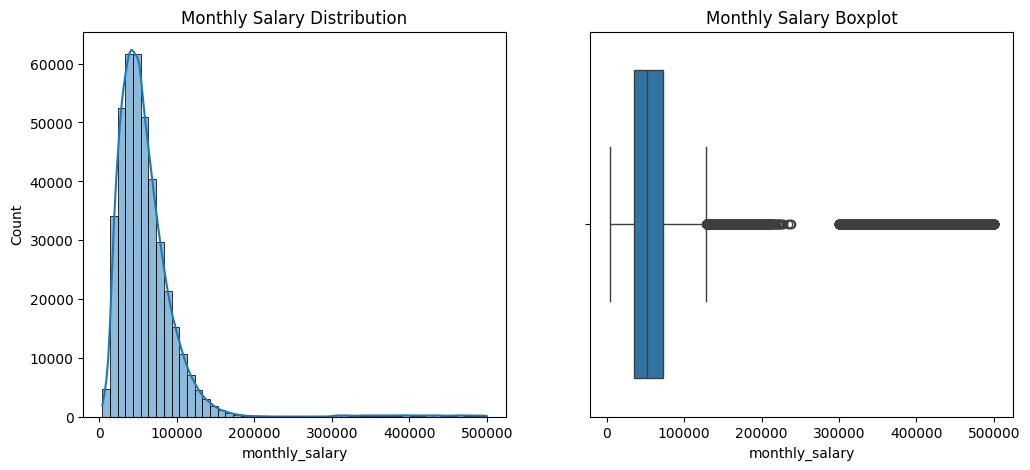

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['monthly_salary'], bins=50, kde=True)
plt.title('Monthly Salary Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['monthly_salary'])
plt.title('Monthly Salary Boxplot')
plt.show()


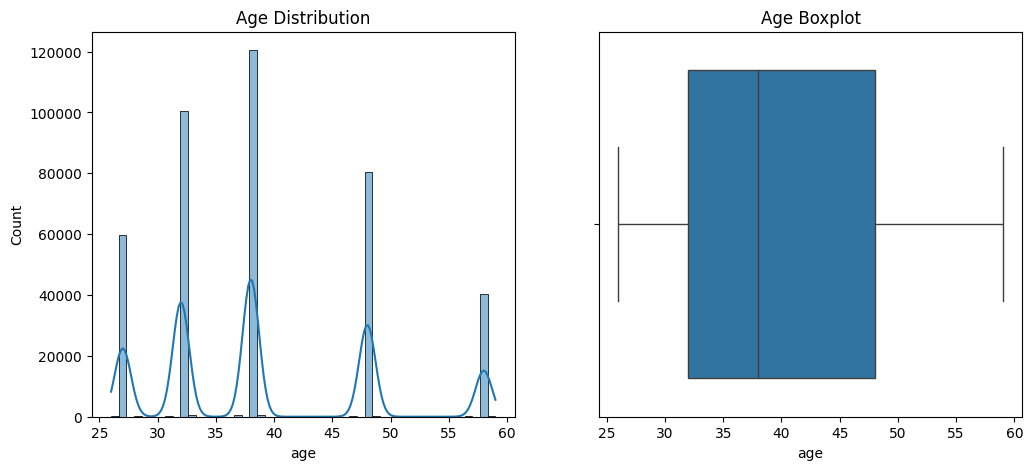

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Age Boxplot')
plt.show()


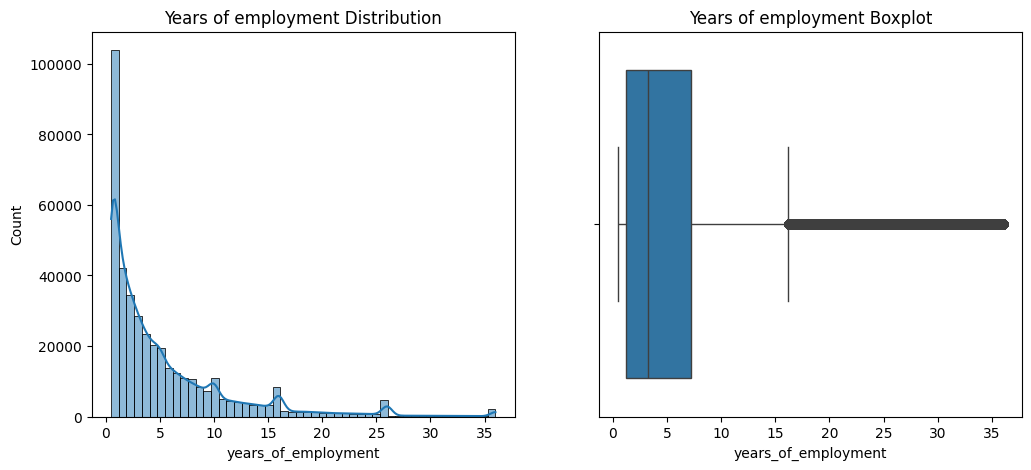

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['years_of_employment'], bins=50, kde=True)
plt.title('Years of employment Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['years_of_employment'])
plt.title('Years of employment Boxplot')
plt.show()


Categorical variable Univarate Analysis

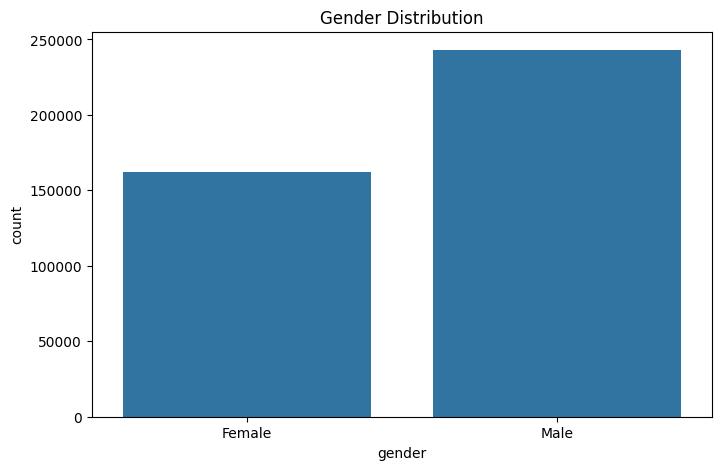

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


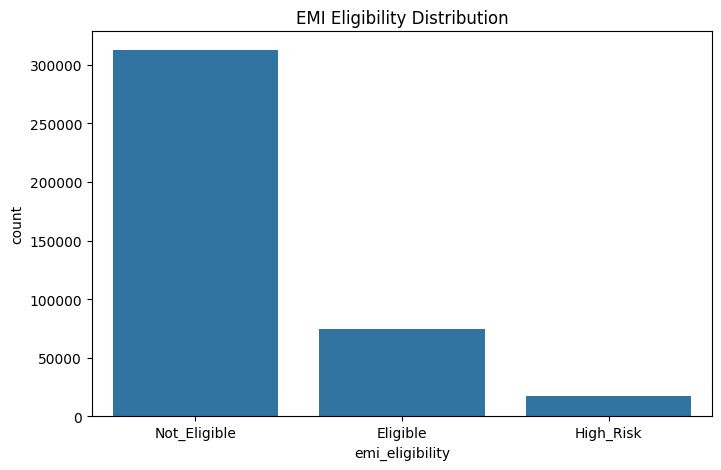

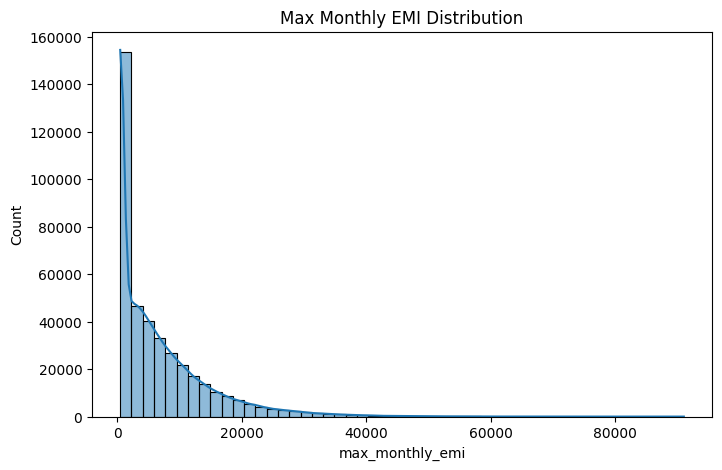

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='emi_eligibility', data=df)
plt.title('EMI Eligibility Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['max_monthly_emi'], bins=50, kde=True)
plt.title('Max Monthly EMI Distribution')
plt.show()


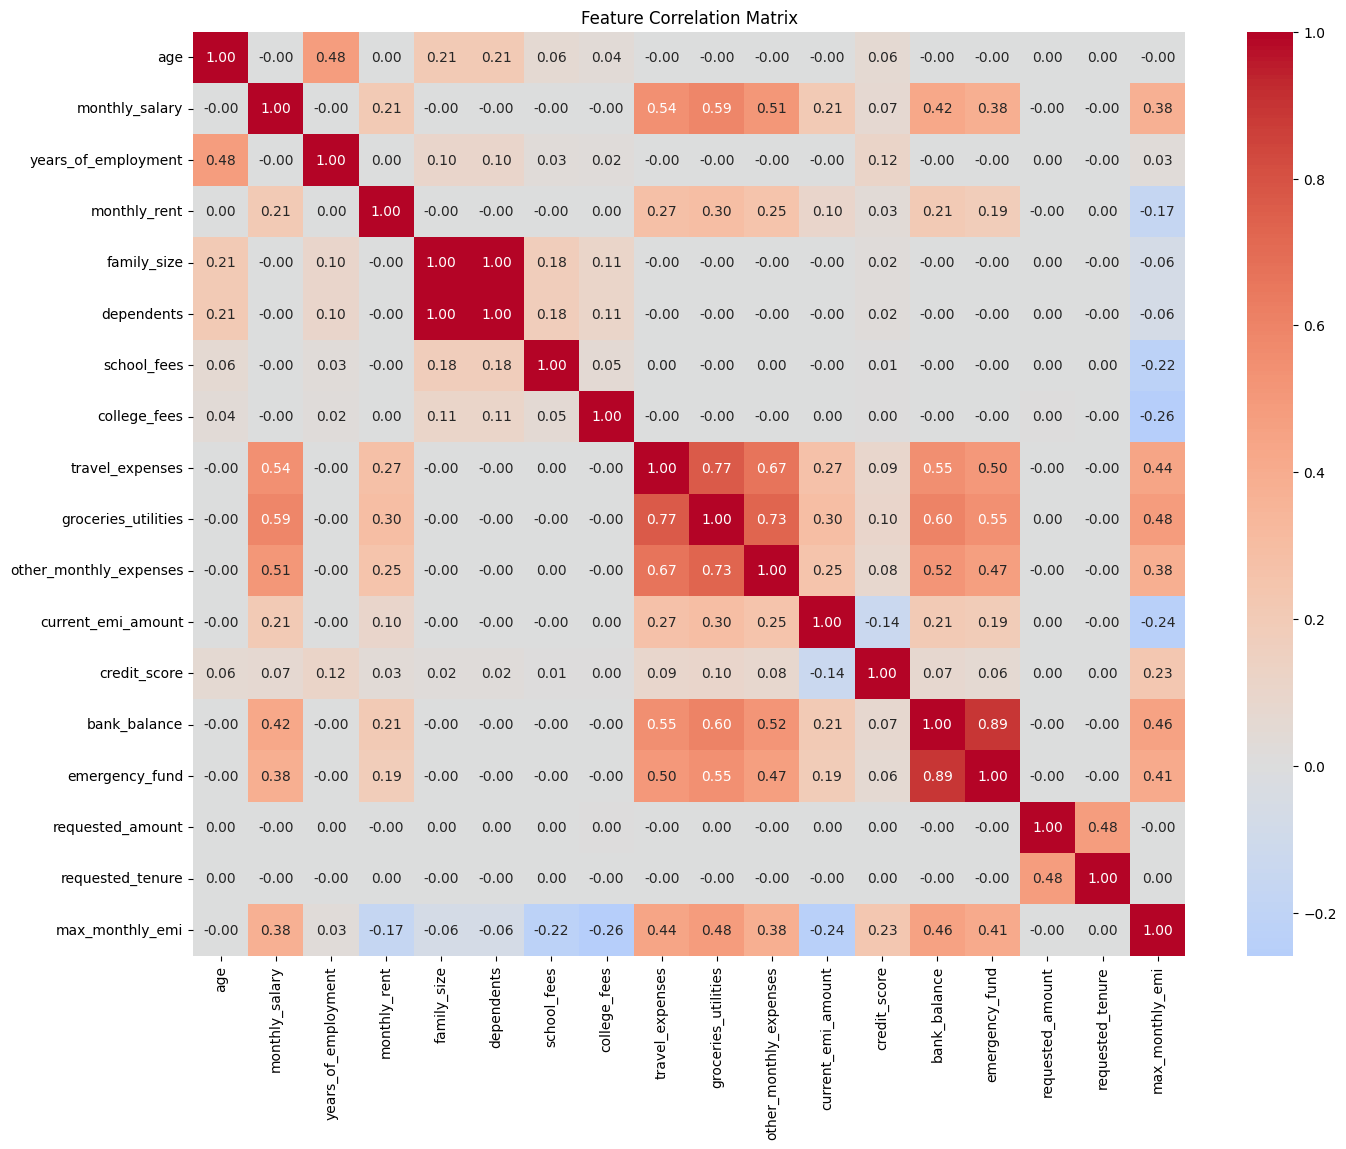

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

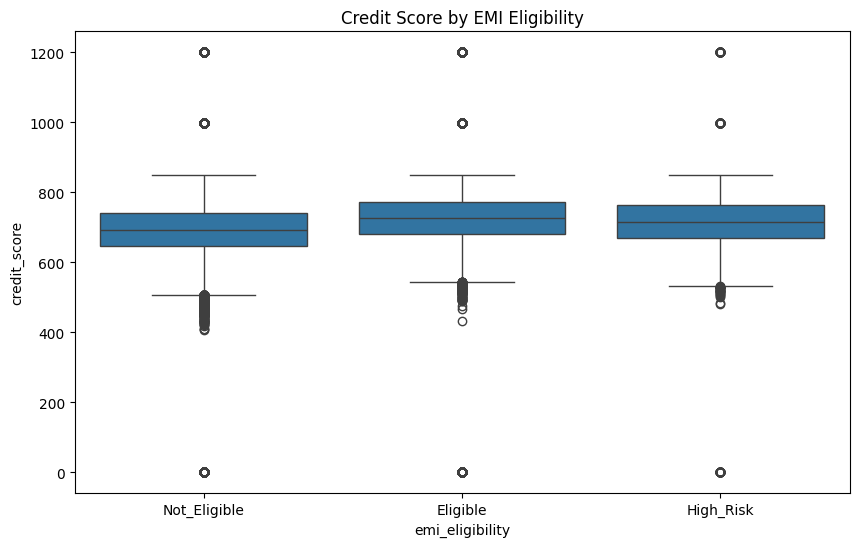

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='emi_eligibility', y='credit_score', data=df)
plt.title('Credit Score by EMI Eligibility')
plt.show()
